In [5]:
import spacy
nlp = spacy.load('en_core_web_lg', disable=["parser", "tagger", "ner"])

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)
EPS = 1e-6

In [8]:
fun_fact_df = pd.read_csv('data/til_title.csv')

/Users/Arshi/anaconda/envs/myenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,2,3,5,8,9,13,14,15,16,19,21,22,24,27,28,33,34,35,41,46,58,60,62,63,64,65,68,74,79,85,92,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
required_columns = ['title', 'subreddit', 'permalink']
fun_fact_df = fun_fact_df.dropna(axis='rows', subset=required_columns)

In [10]:
banned_subreddits = ['circlejerk', 'ShittyTodayILearned', 'TheOnion']
fun_fact_df = fun_fact_df[~fun_fact_df['subreddit'].isin(banned_subreddits)]

In [11]:
fun_fact_df = fun_fact_df.reset_index(drop=True)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy

In [13]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=.8, ngram_range=(1,1), dtype=np.float32)
titles = fun_fact_df['title']
fun_fact_tfidf = vectorizer.fit_transform(titles)

In [14]:
fun_fact_tfidf

<309065x125402 sparse matrix of type '<class 'numpy.float32'>'
	with 2793174 stored elements in Compressed Sparse Row format>

In [15]:
len(vectorizer.get_feature_names())

125402

In [16]:
len(fun_fact_df['title'])

309065

In [17]:
np.sum(fun_fact_tfidf > 0, axis=1) # shows number of tfidf words per doc

matrix([[ 6],
        [10],
        [26],
        ...,
        [ 4],
        [14],
        [ 5]])

In [18]:
features = vectorizer.get_feature_names()
f_vectors = np.array([nlp.vocab[f].vector for f in features])
weighted_embedding = fun_fact_tfidf.dot(f_vectors)
print(weighted_embedding.shape)

(309065, 300)


In [19]:
n_weighted_embedding = weighted_embedding / (np.linalg.norm(weighted_embedding, axis=1)[:, np.newaxis] + EPS)

In [20]:
print(np.linalg.norm(n_weighted_embedding[22291]))
print(np.linalg.norm(n_weighted_embedding[10493]))

0.9999999
0.9999998


In [183]:
query = "donald trump"
query_tfidf = vectorizer.transform([query])
query_weighted = query_tfidf.dot(f_vectors).flatten()
n_query_weighted = query_weighted / np.linalg.norm(query_weighted)
rankings = n_weighted_embedding.dot(n_query_weighted)
rankings_index = np.argsort(-rankings)
fun_fact_df[["subreddit", "title"]].loc[rankings_index]

,subreddit,title
78733,todayilearned,TIL that Donald Trump has a son called Donald Trump Jr and a grandson named Donald Trump III
69266,todayilearned,TIL George Lucas is richer than Donald Trump
14355,todayilearned,TIL: Donald Trump is a racist.
65832,Eve,TIL Donald Trump plays EvE
21678,til,TIL Donald Trump made a cameo in Home Alone 2
306884,todayilearned,TIL: That all of Donald Trump's and Ivanka Trump's clothing line is made abroad.
248913,JonTron,"[NSFL] TIL if Jontron was Bernard Sanderosa he'd be ""Not so Trump"""
235777,todayilearned,TIL Donald Trump is in the WWE Hall of Fame
207169,todayilearned,TIL that Donald Trump is a birther.
178729,todayilearned,TIL Donald Trump is a Birther


In [184]:
query_tfidf.data

array([0.70209175, 0.7120865 ], dtype=float32)

In [185]:
for i in range(20):
    print(rankings[rankings_index[i]], titles[rankings_index[i]])

0.868531 TIL that Donald Trump has a son called Donald Trump Jr and a grandson named Donald Trump III
0.8335789 TIL George Lucas is richer than Donald Trump
0.830231 TIL: Donald Trump is a racist.
0.82419276 TIL Donald Trump plays EvE
0.80874354 TIL Donald Trump made a cameo in Home Alone 2
0.80447483 TIL: That all of Donald Trump's and Ivanka Trump's clothing line is made abroad.
0.799533 [NSFL] TIL if Jontron was Bernard Sanderosa he'd be "Not so Trump"
0.79753613 TIL Donald Trump is in the WWE Hall of Fame
0.79291606 TIL that Donald Trump is a birther. 
0.79291606 TIL Donald Trump is a Birther
0.79291606 TIL that Donald Trump is a birther
0.788839 TIL Arnold Schwarzenegger is not voting for Donald Trump
0.7843784 TIL Donald Trump's father's middle name was Christ.
0.7739253 TIL: Nobody has more respect for women than Donald Trump
0.767748 TIL liberals don't like Donald Trump
0.76654816 TIL Donald Trump's ex wife Ivana Trump stated during her divorce case that Donald had raped her.
0

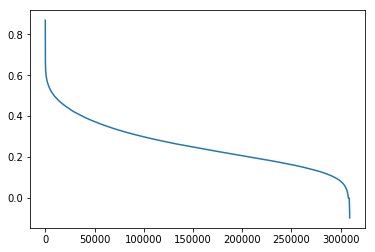

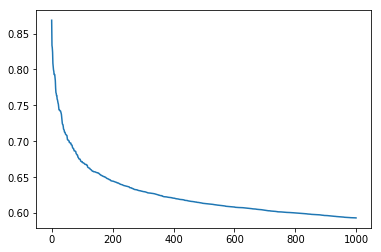

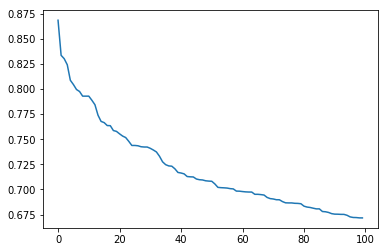

In [186]:
plt.plot(rankings[rankings_index])
plt.show()
plt.plot(rankings[rankings_index[:1000]])
plt.show()
plt.plot(rankings[rankings_index[:100]])
plt.show()

In [187]:
from scipy.ndimage import gaussian_filter
lim = 1000#len(rankings_index)
ys = rankings[rankings_index[:lim]]
xs = np.array(list(range(len(ys))))
# xs = xs_fake
# ys = ys_fake
print(xs.shape)
print(ys.shape)
# smooth out noise
smoothed = gaussian_filter(ys, 3.)

# find the point where the signal goes above the background noise
# level (assumed to be zero here).
base = 0.
std = (ys[xs < 3] - base).std()
m = smoothed < (base - 3. * std)
# print(m)
x0 = xs[m][0]
y0 = ys[m][0]

plt.plot(xs, ys, '.')
# plt.plot(xs, smoothed, '-')
plt.plot(x0, y0, 'o')
plt.show()
print(x0,y0)

(1000,)
(1000,)


IndexError: index 0 is out of bounds for axis 0 with size 0

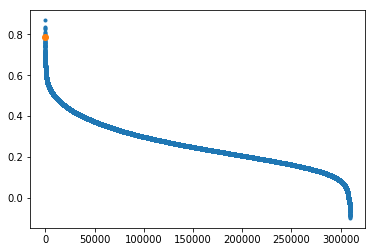

11 0.788839


In [190]:

lim = len(rankings_index)
ys = rankings[rankings_index[:lim]]
# ys = gaussian_filter(ys, 10.)
xs = np.array(list(range(len(ys))))
da = np.gradient(ys)
dda = np.gradient(da)
m = np.argmin(dda)

x0 = xs[m]
y0 = ys[m]

plt.plot(xs, ys, '.')
# plt.plot(xs, smoothed, '-')
plt.plot(x0, y0, 'o')
plt.show()
print(x0,y0)

(array([2.0000e+00, 1.1000e+01, 5.0000e+00, 2.5000e+01, 2.3000e+01,
        3.5000e+01, 3.2000e+01, 6.0000e+01, 8.8000e+01, 1.3500e+02,
        1.1650e+03, 3.0700e+02, 3.6100e+02, 5.9100e+02, 7.9700e+02,
        1.0450e+03, 1.3940e+03, 1.8720e+03, 2.3200e+03, 3.1490e+03,
        3.8230e+03, 4.7200e+03, 5.5920e+03, 6.7330e+03, 7.4800e+03,
        8.4300e+03, 9.4760e+03, 1.0160e+04, 1.0764e+04, 1.1484e+04,
        1.1412e+04, 1.1617e+04, 1.1788e+04, 1.1714e+04, 1.1407e+04,
        1.0929e+04, 1.0616e+04, 1.0090e+04, 9.4790e+03, 9.1210e+03,
        8.5790e+03, 8.0140e+03, 7.5400e+03, 7.2510e+03, 6.5010e+03,
        6.0770e+03, 5.7000e+03, 5.4510e+03, 5.0280e+03, 4.7280e+03,
        4.4530e+03, 4.0140e+03, 3.8650e+03, 3.5710e+03, 3.0320e+03,
        3.0120e+03, 2.6330e+03, 2.6030e+03, 2.3280e+03, 2.0450e+03,
        1.8450e+03, 1.8180e+03, 1.4250e+03, 1.2940e+03, 1.0990e+03,
        9.0500e+02, 7.5700e+02, 7.0600e+02, 5.8200e+02, 4.4900e+02,
        3.5900e+02, 2.9200e+02, 2.4400e+02, 1.67

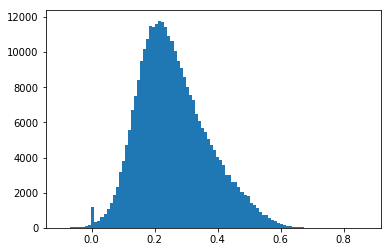

In [191]:
plt.hist(ys, bins=100)

In [197]:
np.sum(scipy.stats.zscore(ys) > 3)

958

In [193]:
def generate_fake_data():
    """Generate data that looks like an example given."""
    xs = np.arange(0, 25, 0.05)
    ys = - 20 * 1./(1 + np.exp(-(xs - 5.)/0.3))
    m = xs > 7.
    ys[m] = -20.*np.exp(-(xs - 7.)[m] / 5.)

    # add noise
    ys += np.random.normal(0, 0.2, xs.size)
    return xs, ys
xs_fake, ys_fake = generate_fake_data()


In [194]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [195]:
TOP_HITS_KMEANS = 10
TOP_HITS_KMEANS2 = np.argmax(rankings[rankings_index] < .65)
if TOP_HITS_KMEANS2 < 20:
    TOP_HITS_KMEANS2 = np.argmax(rankings[rankings_index] < .55)
TOP_HITS_KMEANS2 = max(TOP_HITS_KMEANS2, 20)
print("{}-{}, {}-{}".format(0, TOP_HITS_KMEANS, TOP_HITS_KMEANS, TOP_HITS_KMEANS2))
ranked_titles = titles[rankings_index].tolist()
top_ranked_em = n_weighted_embedding[rankings_index]
kmeans = KMeans(n_clusters=3, random_state=0).fit(top_ranked_em[:TOP_HITS_KMEANS])

0-10, 10-176


In [196]:
for i in range(min(20, TOP_HITS_KMEANS)):
    print(kmeans.labels_[i], "{:.4f}".format(rankings[rankings_index[i]]), titles[rankings_index[i]])

1 0.8685 TIL that Donald Trump has a son called Donald Trump Jr and a grandson named Donald Trump III
2 0.8336 TIL George Lucas is richer than Donald Trump
0 0.8302 TIL: Donald Trump is a racist.
1 0.8242 TIL Donald Trump plays EvE
1 0.8087 TIL Donald Trump made a cameo in Home Alone 2
1 0.8045 TIL: That all of Donald Trump's and Ivanka Trump's clothing line is made abroad.
2 0.7995 [NSFL] TIL if Jontron was Bernard Sanderosa he'd be "Not so Trump"
1 0.7975 TIL Donald Trump is in the WWE Hall of Fame
0 0.7929 TIL that Donald Trump is a birther. 
0 0.7929 TIL Donald Trump is a Birther


In [66]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, top_ranked_em[:TOP_HITS_KMEANS])

In [67]:
for c, i in enumerate(closest):
    print(c, ranked_titles[i])

0 +2 0 TIL How to eat an apple
1 TIL you can bring a goat into an Apple Store
2 TIL you can see the apple through the other side.


In [68]:
kmeans2 = KMeans(n_clusters=7, random_state=0).fit(top_ranked_em[TOP_HITS_KMEANS:TOP_HITS_KMEANS2])
closest2, _ = pairwise_distances_argmin_min(kmeans2.cluster_centers_, top_ranked_em[TOP_HITS_KMEANS:TOP_HITS_KMEANS2])
for c, i in enumerate(closest2):
    print(c, ranked_titles[i + TOP_HITS_KMEANS])

0 TIL food labels list ingredients by weight, which means most of the self-advertised "healthy" foods I was eating have more sugar than anything else.
1 TIL that Burger King set out to find people all over the world that had never eaten a hamburger and made a mini documentary about people having a Big Mac/Whopper taste test in the last known places to never experience American fast food.
2 TIL, There is an African fruit (Synsepalum dulcificum) that causes sour foods like lemon and limes to taste sweet like candy when eaten.
3 TIL an inmates last meal was 2 chicken fried steaks, a triple bacon cheeseburger,a large bowl of fried okra, 1 lb of barbecue, 3 fajitas,a meat lover's pizza,a pint of ice cream,and a slab of peanut butter fudge with crushed peanuts.He refused the meal.Texas ended the tradition of giving last meals.
4 TIL that if you take frozen fruit and add milk and maybe a little sugar it kind of turns into ice cream and is delicious
5 TIL The first design for the original Appl

# Doing more clusters and picking biggest ones

In [79]:
TOP_HITS_KMEANS = np.argmax(rankings[rankings_index] < .65)
if TOP_HITS_KMEANS < 20:
    TOP_HITS_KMEANS = np.argmax(rankings[rankings_index] < .55)
TOP_HITS_KMEANS = max(TOP_HITS_KMEANS, 20)
ranked_titles = titles[rankings_index].tolist()
top_ranked_em = n_weighted_embedding[rankings_index]
kmeans = KMeans(n_clusters=20, random_state=0).fit(top_ranked_em[:TOP_HITS_KMEANS])

In [80]:
kmeans.labels_

array([ 8,  9,  9, ...,  9,  5, 15], dtype=int32)

In [81]:
import collections
counter = collections.Counter(kmeans.labels_)
most_common = counter.most_common(10)
most_common = [i[0] for i in most_common]
closest2, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_[most_common], top_ranked_em[:TOP_HITS_KMEANS])
for c, i in enumerate(closest2):
    print(c, ranked_titles[i])

0 TIL Texas abolished last meal requests after a prisoner ordered 2 chicken-fried steaks, a triple cheeseburger, a beef &amp; cheese omelet , a pound of barbecued meat, a half loaf of bread, 3 fajitas, a meat-lover's pizza, fried okra, a pint of Blue Bell, and peanut-butter fudge, and then did not eat it.
1 TIL this is actually food
2 TIL, There is an African fruit (Synsepalum dulcificum) that causes sour foods like lemon and limes to taste sweet like candy when eaten.
3 TIL that music can can alter the way food tastes. Soft, high-pitched music can make the body think it's consumed more sugar than it actually has, so is being used as a treatment for diabetes.
4 TIL The worlds oldest cat who lived till 38 had an unusual diet of bacon and eggs, asparagus, broccoli, and coffee with heavy cream. The owner also had a second cat who lived to 34 on the same diet
5 TIL that Coke in a bottle really DOES taste better because it's made with real sugar instead of corn syrup.
6 TIL that if you take

In [72]:
counter

Counter({8: 165,
         9: 112,
         4: 171,
         5: 164,
         13: 112,
         15: 164,
         10: 152,
         11: 157,
         12: 172,
         0: 97,
         17: 115,
         16: 139,
         19: 63,
         6: 148,
         2: 173,
         7: 126,
         3: 166,
         14: 106,
         18: 92,
         1: 23})

In [74]:
kmeans.labels_

array([ 8,  9,  9, ...,  9,  5, 15], dtype=int32)